<a href="https://colab.research.google.com/github/670510772/229351-Statlearningfordatasci1/blob/main/670510772_LAB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [ ]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:13:35--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:13:35 (48.7 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


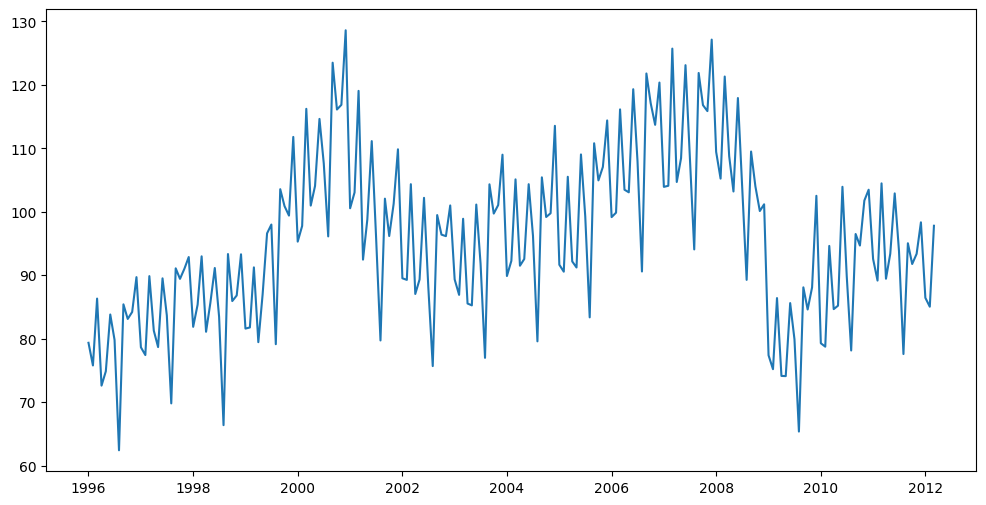

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [ ]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
data.loc['1996-01-01']

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [ ]:
# Add or change values

data.loc['2012-01-01','value'] = 86.45

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.45


# Moving average

In [ ]:
#5-MA
data['MA'] = data['value'].rolling(window=5,center=True).mean()
#12-MA
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.tail(12)

,Unnamed: 0,value,MA
time,,,
2011-04-01,184,89.45,94.735417
2011-05-01,185,93.40,94.264167
2011-06-01,186,102.90,93.700000
2011-07-01,187,93.77,93.230833
2011-08-01,188,77.58,92.804167
2011-09-01,189,95.04,92.354167
2011-10-01,190,91.77,NaN
2011-11-01,191,93.37,NaN
2011-12-01,192,98.34,NaN


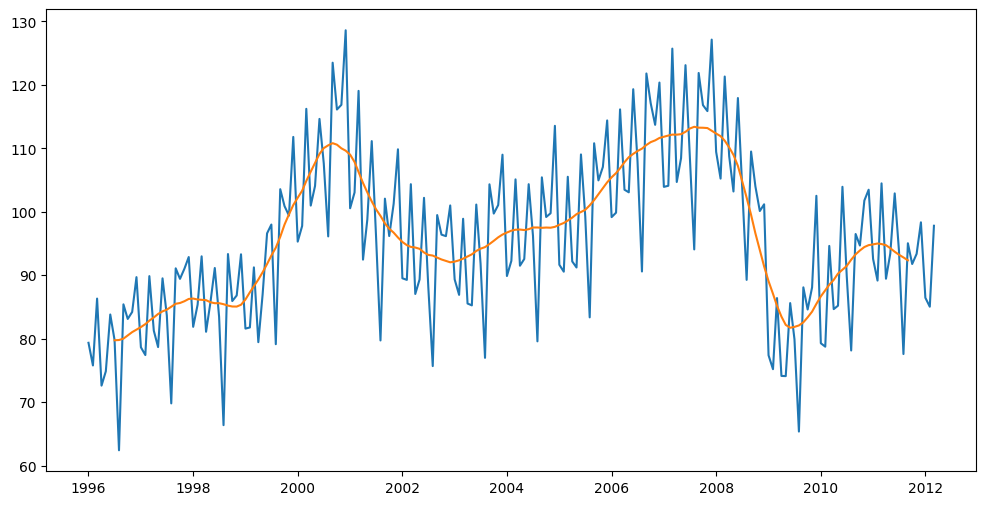

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

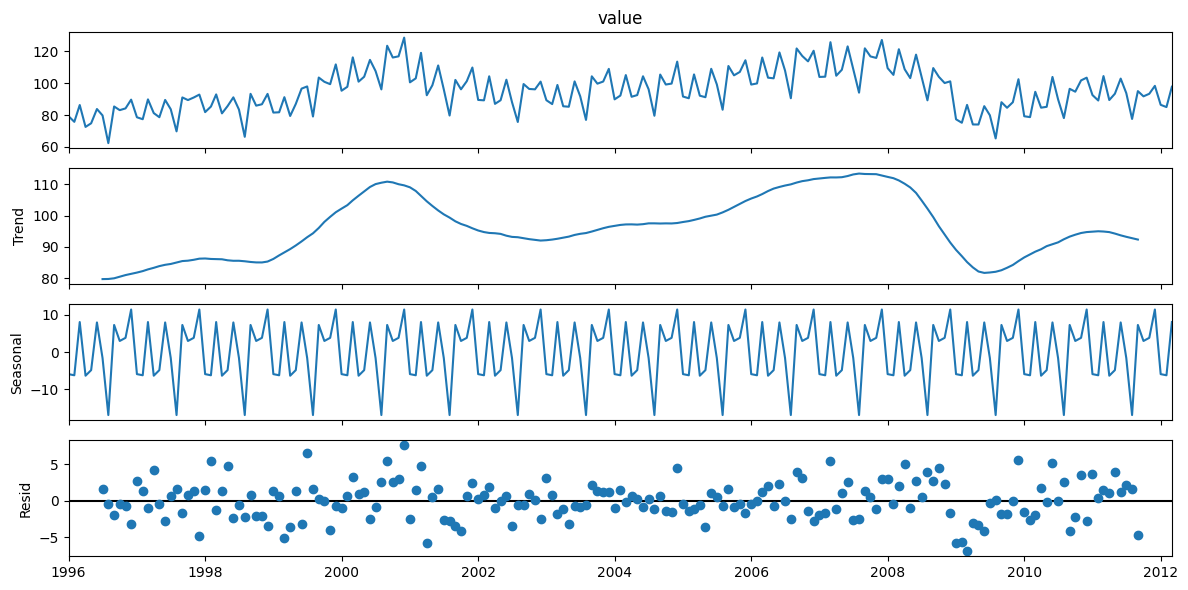

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive')

result_add.plot();

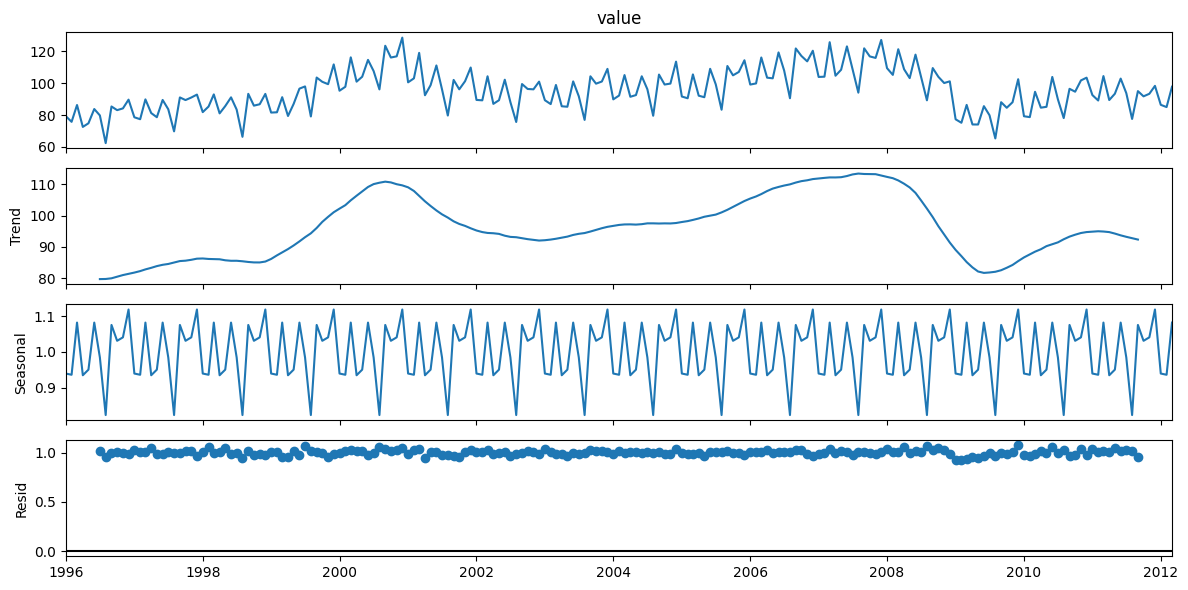

In [ ]:
result_mul = seasonal_decompose(data['value'], model='multiplicative')

result_mul.plot();

### เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.887651
1996-02-01    -6.199262
1996-03-01     8.083182
1996-04-01    -6.314957
1996-05-01    -4.818457
                ...    
2011-11-01     3.847376
2011-12-01    11.447515
2012-01-01    -5.887651
2012-02-01    -6.199262
2012-03-01     8.083182
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.45
2012-02-01    85.04
2012-03-01    97

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [ ]:
data.loc['1996-01-01' : '2009-12-01']

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
...,...,...,...
2009-08-01,164,65.36,82.087083
2009-09-01,165,88.09,82.577500
2009-10-01,166,84.60,83.358750


In [ ]:
data.loc['2010-01-01' : '2012-03-01']

,Unnamed: 0,value,MA
time,,,
2010-01-01,169,79.28,86.665417
2010-02-01,170,78.74,87.613333
2010-03-01,171,94.62,88.496250
2010-04-01,172,84.66,89.266667
2010-05-01,173,85.20,90.256667
2010-06-01,174,103.94,90.866667
2010-07-01,175,89.87,91.460417
2010-08-01,176,78.14,92.448333
2010-09-01,177,96.50,93.293333


In [ ]:
TR = ((result_add.trend) + (result_add.resid)).dropna().iloc[-1]
print(TR)

87.73571730324075


In [ ]:
St = result_add.seasonal.groupby(result_add.seasonal.index.month).first()
print(St)

time
1     -5.887651
2     -6.199262
3      8.083182
4     -6.314957
5     -4.818457
6      7.976099
7     -1.575353
8    -16.870457
9      7.304283
10     3.007682
11     3.847376
12    11.447515
Name: seasonal, dtype: float64


In [ ]:
Yt = St + TR
print(Yt)

time
1     81.848066
2     81.536455
3     95.818899
4     81.420760
5     82.917260
6     95.711816
7     86.160365
8     70.865260
9     95.040000
10    90.743399
11    91.583094
12    99.183233
Name: seasonal, dtype: float64


In [ ]:
RMSE = rmse(data.loc['2010-01-01' : '2012-03-01']['value'],Yt)
print(RMSE)

nan


In [ ]:
RMSE = rmse(data.loc['2010-01-01' : '2012-03-01']['value'],data.loc['2010-01-01' : '2012-03-01']['MA'])
print(RMSE)

7.622136332865329


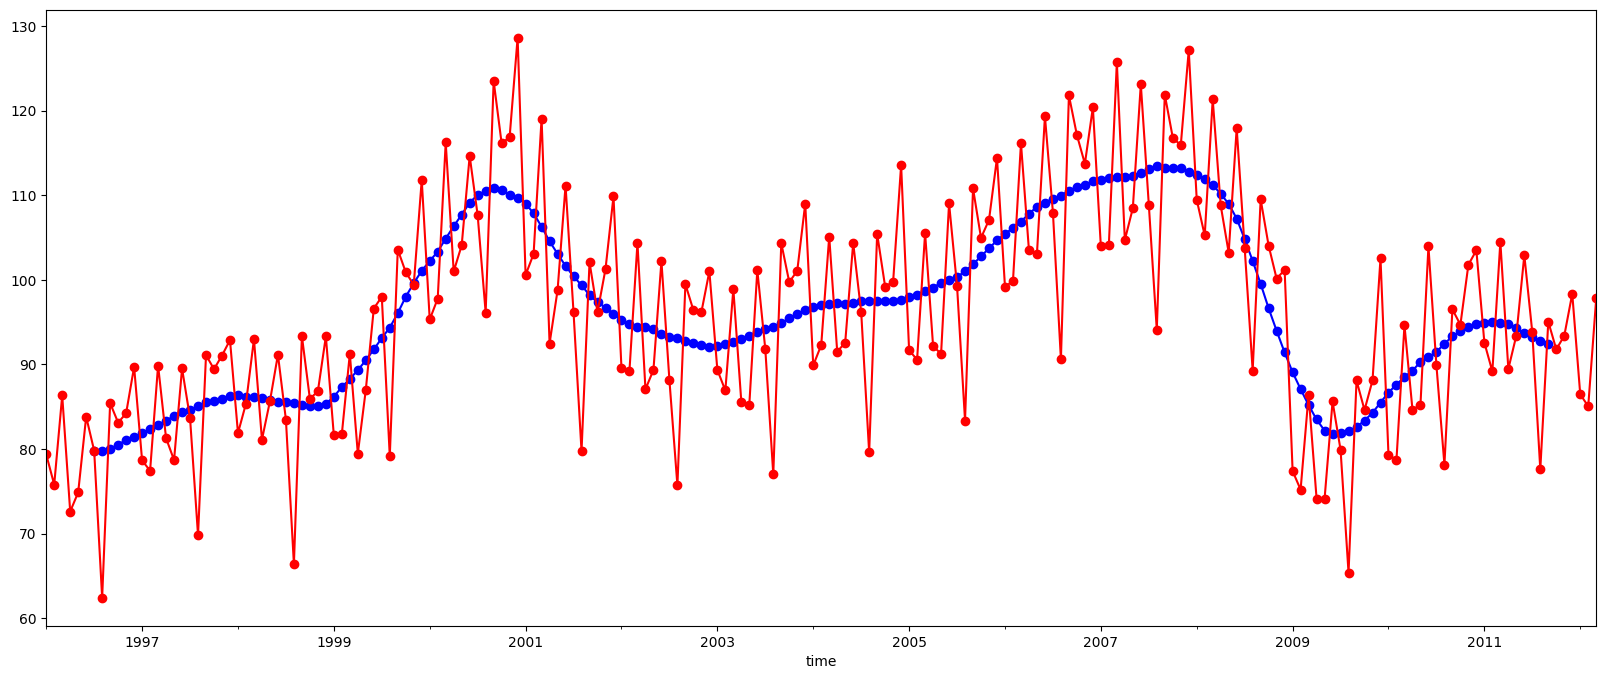

In [ ]:
ax = result_add.trend.plot(marker='o', color='blue', figsize=(20,8))
ax = result_add.observed.plot(marker='o', color='red', figsize=(20,8))